<a href="https://colab.research.google.com/github/SadmanSarar/retina-blood-vessel-detection/blob/master/Notebook_Retina_Blood_Vessel_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/SadmanSarar/retina-blood-vessel-detection.git
!cd retina-blood-vessel-detection/ && mv * ../

Cloning into 'retina-blood-vessel-detection'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 12 (delta 0), reused 12 (delta 0), pack-reused 0
Unpacking objects: 100% (12/12), done.


In [2]:
# Downloading the weights
!gdown --id '1_hpfspGGJcWyFcGLXkFUa4k1NdUyOSOb' 

Downloading...
From: https://drive.google.com/uc?id=1_hpfspGGJcWyFcGLXkFUa4k1NdUyOSOb
To: /content/weight_retina.hdf5
248MB [00:03, 80.7MB/s]


In [3]:
# Downloading the data set
# 17wVfELqgwbp4Q02GD247jJyjq6lwB0l6
!gdown --id '17wVfELqgwbp4Q02GD247jJyjq6lwB0l6' 


Downloading...
From: https://drive.google.com/uc?id=17wVfELqgwbp4Q02GD247jJyjq6lwB0l6
To: /content/DRIVE.zip
29.8MB [00:00, 71.7MB/s]


In [4]:
#Unzipping the dataset
!unzip DRIVE.zip

Archive:  DRIVE.zip
   creating: DRIVE/test/
   creating: DRIVE/test/1st_manual/
 extracting: DRIVE/test/1st_manual/12_manual1.gif  
 extracting: DRIVE/test/1st_manual/02_manual1.gif  
 extracting: DRIVE/test/1st_manual/03_manual1.gif  
 extracting: DRIVE/test/1st_manual/04_manual1.gif  
 extracting: DRIVE/test/1st_manual/05_manual1.gif  
 extracting: DRIVE/test/1st_manual/06_manual1.gif  
 extracting: DRIVE/test/1st_manual/07_manual1.gif  
 extracting: DRIVE/test/1st_manual/08_manual1.gif  
 extracting: DRIVE/test/1st_manual/09_manual1.gif  
 extracting: DRIVE/test/1st_manual/10_manual1.gif  
 extracting: DRIVE/test/1st_manual/11_manual1.gif  
 extracting: DRIVE/test/1st_manual/01_manual1.gif  
 extracting: DRIVE/test/1st_manual/13_manual1.gif  
 extracting: DRIVE/test/1st_manual/14_manual1.gif  
 extracting: DRIVE/test/1st_manual/15_manual1.gif  
 extracting: DRIVE/test/1st_manual/16_manual1.gif  
 extracting: DRIVE/test/1st_manual/17_manual1.gif  
 extracting: DRIVE/test/1st_manual/

In [5]:
# renaming weight
!mv weight_retina.hdf5 weight_lstm.hdf5

In [6]:
# preparing test dataset
!python prepare_datasets_DRIVE.py
!python save_patch.py

original image: 38_training.tif
ground truth name: 38_manual1.gif
border masks name: 38_training_mask.gif
original image: 22_training.tif
ground truth name: 22_manual1.gif
border masks name: 22_training_mask.gif
original image: 33_training.tif
ground truth name: 33_manual1.gif
border masks name: 33_training_mask.gif
original image: 34_training.tif
ground truth name: 34_manual1.gif
border masks name: 34_training_mask.gif
original image: 25_training.tif
ground truth name: 25_manual1.gif
border masks name: 25_training_mask.gif
original image: 29_training.tif
ground truth name: 29_manual1.gif
border masks name: 29_training_mask.gif
original image: 31_training.tif
ground truth name: 31_manual1.gif
border masks name: 31_training_mask.gif
original image: 24_training.tif
ground truth name: 24_manual1.gif
border masks name: 24_training_mask.gif
original image: 28_training.tif
ground truth name: 28_manual1.gif
border masks name: 28_training_mask.gif
original image: 30_training.tif
ground truth n

In [7]:
!mkdir test
!python evaluate.py

2020-11-17 18:21:27.872074: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
the side W is not compatible with the selected stride of 5
img_w 565, patch_w 64, stride_w 5
(img_w - patch_w) MOD stride_w: 1
So the W dim will be padded with additional 4 pixels
new full images shape: 
(4, 1, 584, 569)

test images shape:
(4, 1, 584, 569)

test mask shape:
(4, 1, 584, 565)
test images range (min-max): 0.0 - 1.0
test masks are within 0-1

Number of patches on h : 105
Number of patches on w : 102
number of patches per image: 10710, totally for this dataset: 42840
tcmalloc: large alloc 1403781120 bytes == 0x26354000 @  0x7f11556c61e7 0x7f1151e625e1 0x7f1151ec6c78 0x7f1151ec6f37 0x7f1151f5ef28 0x50a4a5 0x50beb4 0x5095c8 0x50a2fd 0x50beb4 0x507be4 0x509900 0x50a2fd 0x50cc96 0x507be4 0x50ad03 0x634e72 0x634f27 0x6386df 0x639281 0x4b0dc0 0x7f11552c3bf7 0x5b259a

test PATCHES images shape:
(42840, 1, 64, 64)
test PATCHES images ran

In [8]:
import numpy as np
from matplotlib import pyplot as plt

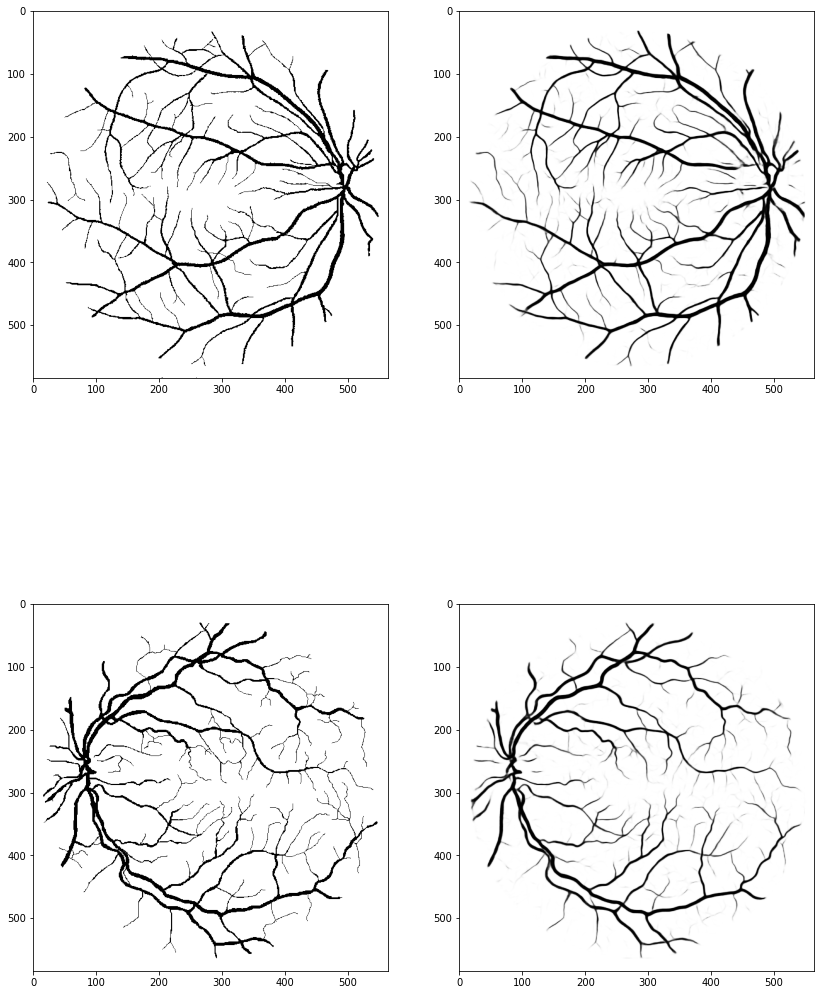

In [9]:
origin = np.load('origin.npy')
pred_imgs = np.load('pred_imgs.npy')
results = np.load('resutls.npy')

outputShape = 2
f, axarr = plt.subplots(outputShape,2)
for i in range(outputShape,outputShape+2,1):
  axarr[i-2,0].imshow(origin[i,0,:,:],cmap='Greys')
  axarr[i-2,1].imshow(pred_imgs[i,0,:,:],cmap='Greys')
  # axarr[i,2].imshow(results[i,0,:,:],cmap='Greys')

fig = plt.gcf()
fig.set_size_inches(14,20)
plt.show()

In [10]:
patches_imgs_train = np.load('patches_imgs_train.npy')
patches_masks_train = np.load('patches_masks_train.npy')

outputShape = patches_imgs_train.shape[0]
print(outputShape)


200


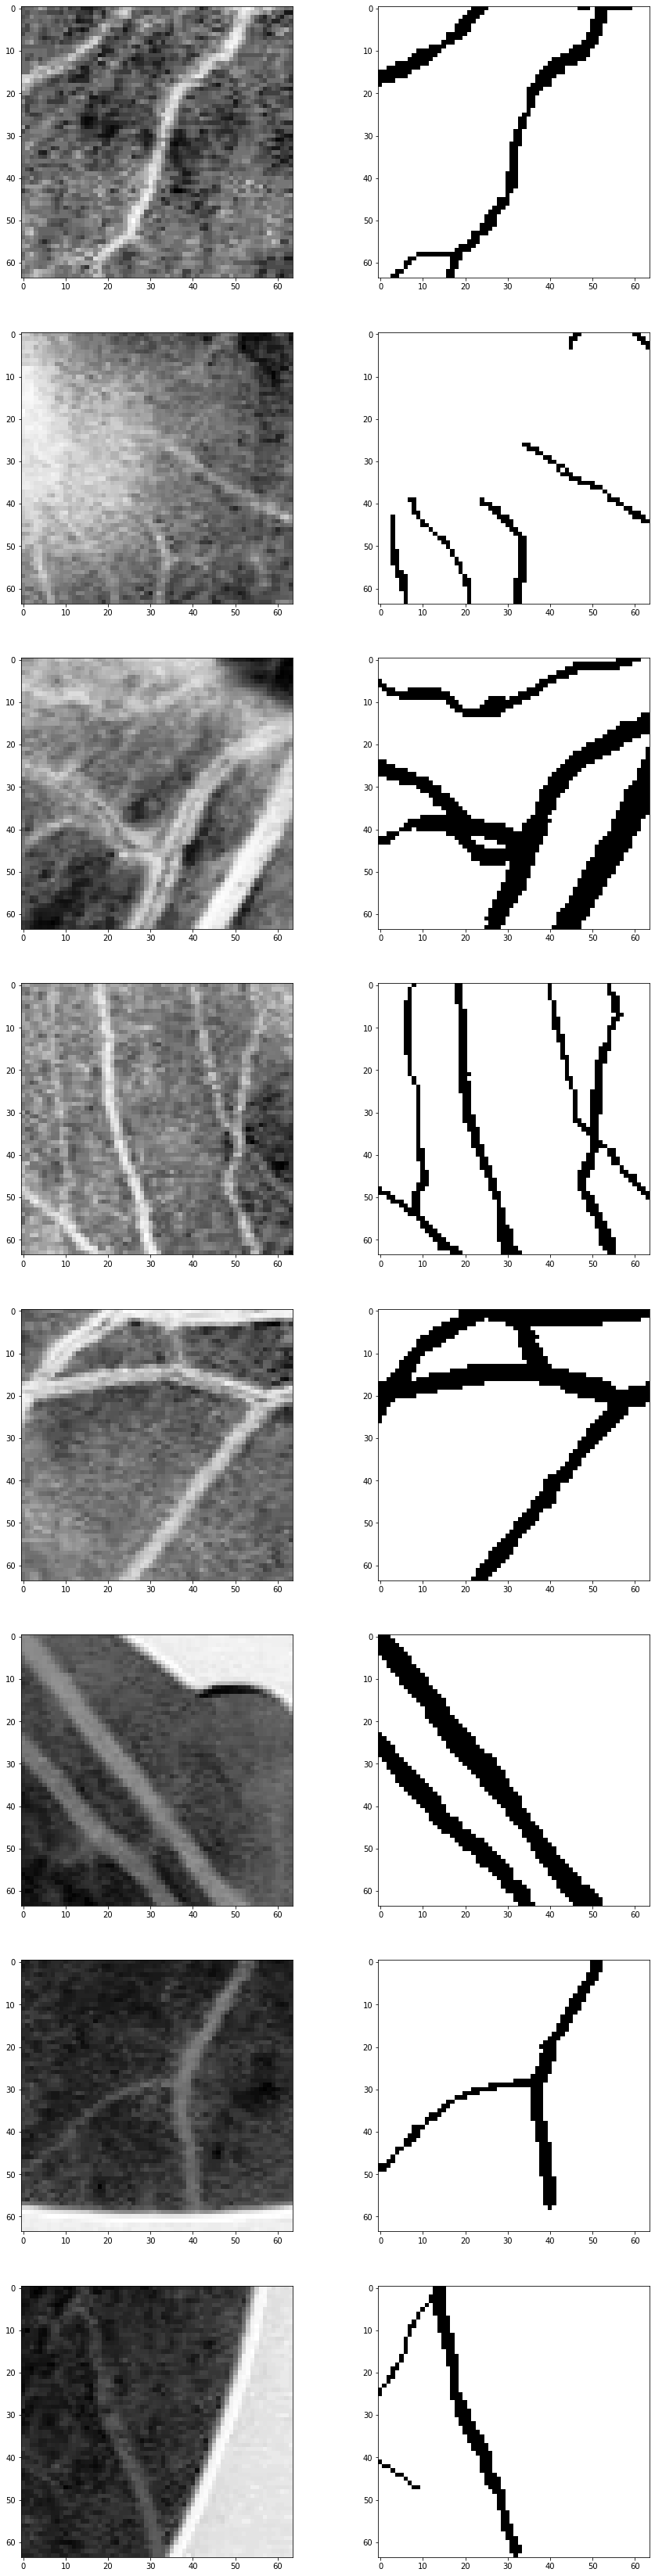

In [11]:
f, axarr = plt.subplots(8,2)
for i in range(8):
  axarr[i,0].imshow(patches_imgs_train[i,0,:,:],cmap='Greys')
  axarr[i,1].imshow(patches_masks_train[i,0,:,:],cmap='Greys')

fig = plt.gcf()
fig.set_size_inches(15,60)
plt.show()

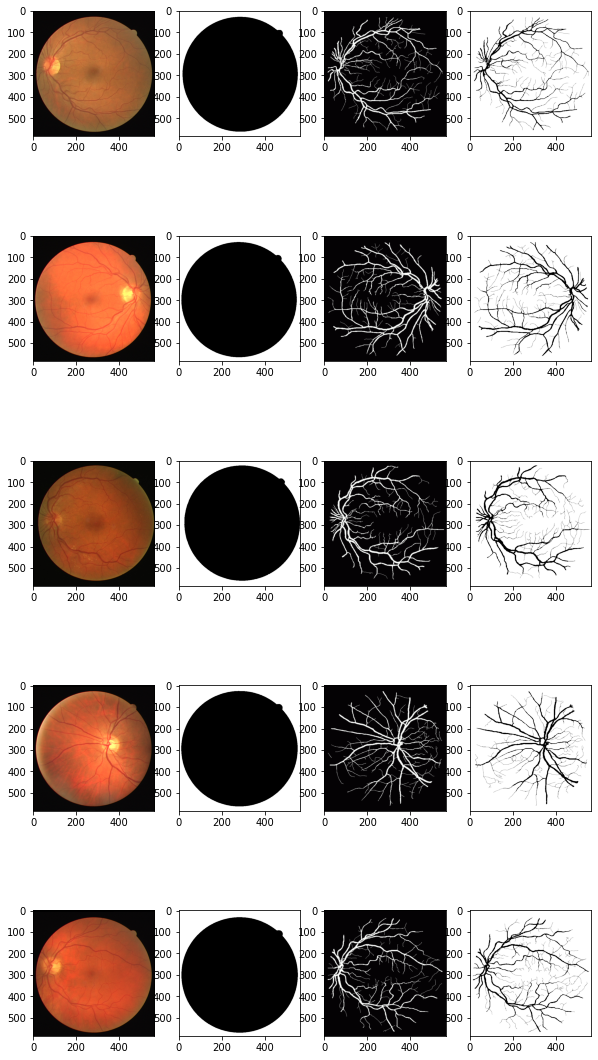

In [12]:
testImageNo = 5
f, axarr = plt.subplots(testImageNo,4)
for i in range(testImageNo):
  img = plt.imread('DRIVE/test/images/'+"{0:0=2d}".format(i+1)+'_test.tif')
  axarr[i,0].imshow(img)
  imgMask = plt.imread('DRIVE/test/mask/'+"{0:0=2d}".format(i+1)+'_test_mask.gif')
  axarr[i,1].imshow(imgMask, cmap="Greys")
  axarr[i,2].imshow(plt.imread('DRIVE/test/2nd_manual/'+"{0:0=2d}".format(i+1)+'_manual2.gif'))
  axarr[i,3].imshow(plt.imread('DRIVE/test/1st_manual/'+"{0:0=2d}".format(i+1)+'_manual1.gif'),cmap='Greys')
  
fig = plt.gcf()
fig.set_size_inches(10,20)
plt.show()